In [1]:
#pip install pandas
#pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def dict_size(dict):
    total_count = sum(len(values) for values in dict.values())
    print(total_count)

In [4]:
def check_accuracy(csv_path, dict):

    dict = {key.lower(): [vehicle.lower() for vehicle in vehicles] for key, vehicles in dict.items()}
    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            name = path_parts[-2].strip().lower()  

            # Check if the label and vehicle name match in the dictionary
            if row['label'] in dict and name in dict[row['label']]:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [5]:

def base_accuracy(csv_path):
    vehicles = [
    "car","motorcycle", "bicycle","truck","bus","van","rickshaw","scooter","skateboard",
    "ambulance","fire truck","tractor",
    "segway","unicycle","jet ski","helicopter","airplane","boat","kayak"
]


    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    # Strip and convert labels to lowercase
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            vehicle_name = path_parts[-2].strip().lower()  

            # Check if the label and vehicle name match in the dictionary
            if row['label'] == vehicle_name:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

## Base 20 Vehicles

In [6]:
print(base_accuracy('base20.csv'))

70.8


## Amount of Wheels

In [7]:
wheels_dict = {
    "vehicle with two wheels": ["motorcycle", "bicycle", "scooter", "segway"],
    "vehicle with three wheels": ["rickshaw"],
    "vehicle with four wheels": ["car", "van", "ambulance", "tractor","skateboard"],
    "vehicle with more than four wheels": ["truck", "bus", "fire truck", "airplane"],
    "vehicle with no wheels": ["jet ski", "helicopter", "boat", "kayak"],
    "vehicle with one wheel": ["unicycle"]
}

# dict_size(wheels_dict)
print(check_accuracy('wheel.csv', wheels_dict)) 


28.77


## Domain (land, air, watter)

In [8]:
domain_dict = {"land vehicle": ["car", "motorcycle", "bicycle", "truck", "bus", "van", "rickshaw", "scooter", "skateboard", "ambulance", "fire truck", "tractor", "segway", "unicycle"],
               "water vehicle": ["boat", "kayak", "jet ski"],   
               "air vehicle": ["helicopter", "airplane"]}

#dict_size(domain_dict)
print(check_accuracy('domain.csv', domain_dict))

65.34


In [9]:
domain2_dict = {"landborne vehicle": ["car", "motorcycle", "bicycle", "truck", "bus", "van", "rickshaw", "scooter", "skateboard", "ambulance", "fire truck", "tractor", "segway", "unicycle"],
               "aquatic vehicle": ["boat", "kayak", "jet ski"],   
               "airborne vehicle": ["helicopter", "airplane"]}

#dict_size(domain_dict)
print(check_accuracy('domain2.csv', domain2_dict))

75.06


## Fly or Not

In [10]:
fly_dict = {"Airborne Vehicle": ["helicopter", "airplane"],
            "Not Airborne Vehicle": ["car", "motorcycle", "bicycle", "truck", "bus", "van", 
                "rickshaw", "scooter", "skateboard", "ambulance", "fire truck", 
                "tractor", "segway", "unicycle", "boat", "kayak", "jet ski"]}

# dict_size(fly_dict)
print(check_accuracy('airborne.csv', fly_dict))

73.35


## Aquatic or Not

In [11]:
aquatic_dict = {"Aquatic Vehicle": ["boat", "kayak", "jet ski"],    
                "Not Aquatic Vehicle": ["car", "motorcycle", "bicycle", "truck", "bus", "van","rickshaw", 
                    "scooter", "skateboard", "ambulance", "fire truck", "tractor", "segway", "unicycle","helicopter", "airplane"]}

# dict_size(aquatic_dict)
print(check_accuracy('aquatic.csv', aquatic_dict))

40.42


In [12]:
waterborne_dict = {"Waterborne Vehicle": ["boat", "kayak", "jet ski"],    
                "Not Waterborne Vehicle": ["car", "motorcycle", "bicycle", "truck", "bus", "van","rickshaw", 
                    "scooter", "skateboard", "ambulance", "fire truck", "tractor", "segway", "unicycle","helicopter", "airplane"]}

# dict_size(aquatic_dict)
print(check_accuracy('waterborne.csv', waterborne_dict))

51.51


## Powered Vehicle

In [13]:
powered_dict = {"Powered Vehicle": ["car", "motorcycle", "truck", "bus", "van", "rickshaw", "scooter",  "ambulance", "fire truck", "tractor", "segway", "helicopter", "airplane", "boat", "jet ski"],
                "Non-Powered Vehicle": ["bicycle", "skateboard", "unicycle","kayak"]}

# dict_size(powered_dict)
print(check_accuracy('powered.csv', powered_dict))


53.06


## 5 Categories

In [14]:
vehicle_groups = {
    "car motorcycle bicycle truck": ["car", "motorcycle", "bicycle", "truck"],
    "bus van rickshaw scooter": ["bus", "van", "rickshaw", "scooter"],
    "skateboard ambulance fire-truck tractor": ["skateboard", "ambulance", "fire truck", "tractor"],
    "segway unicycle jet-ski helicopter": ["segway", "unicycle", "jet ski", "helicopter"],
    "airplane boat kayak": ["airplane", "boat", "kayak"]
}

print(check_accuracy('5groups.csv', vehicle_groups))


60.23


## Graphing

In [15]:
category_counts = {
    2: [check_accuracy('aquatic.csv', aquatic_dict), check_accuracy('airborne.csv', fly_dict), check_accuracy('powered.csv', powered_dict),print(check_accuracy('waterborne.csv', waterborne_dict))],
    3: [check_accuracy('domain.csv', domain_dict), check_accuracy('domain2.csv', domain2_dict)],  
    5: [check_accuracy('5groups.csv', vehicle_groups)],  
    20: [base_accuracy('base20.csv')]
}

amount_categories = []
accuracies = []

51.51


In [16]:
#Calculate accuracy for each category count
for count, accuracy in category_counts.items():

        if isinstance(accuracy, list):
                for each in accuracy:
                    amount_categories.append(count)
                    accuracies.append(each)
        else:
                amount_categories.append(count)
                accuracies.append(accuracy)
        

In [17]:
print(len(amount_categories), len(accuracies))

8 8


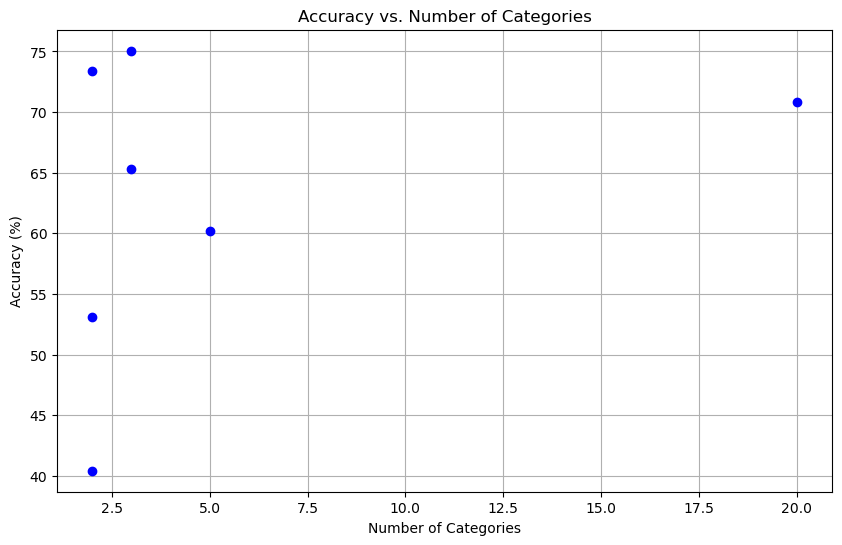

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(amount_categories, accuracies, marker='o', linestyle='None', color='blue')
plt.xlabel('Number of Categories')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Categories')
plt.grid()
plt.show()